# Classification
Most real-world machine learning problems use **supervised learning**. In supervised learning, the model will learn from a labeled training dataset. A target label is a variable that we want to predict. It is an extra piece of information that helps in making decisions or predictions.

For example, which loan application is safe or risky, whether a patient suffers from a disease or not, house prices, and credit eligibility scores. These labels act as a supervisor or teacher for the learning process. **Classification** is one type of supervised learning algorithms. 

A classification problem has a categorical target variable, such as a loan application status as safe or risky, if a patient suffers from a disease, etc.

In this chapter, we will learn two classification algorithms: **decision tree** and **K-Nearest Neighbor (KNN)**.

## Decision Tree Classification

Decision tree builds classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play Golf) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

![](images/1.jpg)


The core algorithm for building decision trees is called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses **Entropy** and **Information Gain** to construct a decision tree.

### Entropy
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

To build a decision tree, we need to calculate two types of entropy using frequency tables as follows:	

* (a) Entropy using the frequency table of one attribute:
![](images/2.jpg)

* (b) Entropy using the frequency table of two attributes:
!![](images/3.jpg)


### Information Gain
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Step 1: Calculate entropy of the target. 

![](images/4.jpg)

Step 2: The dataset is then split on the different attributes. The entropy for each branch is calculated. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

![](images/5.jpg)

Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

![](images/6.jpg)

Step 4a: A branch with entropy of 0 is a leaf node.

![](images/7.jpg)

Step 4b: A branch with entropy more than 0 needs further splitting.

Step 5: The ID3 algorithm is run recursively on the non-leaf branches, until all data is classified.

![](images/9.jpg)

## C4.5

ID3 is the most common conventional decision tree algorithm but it has bottlenecks. Attributes must be nominal values, dataset must not include missing data, and finally the algorithm tend to fall into overfitting. Here, Ross Quinlan, inventor of ID3, made some improvements for these bottlenecks and created a new algorithm named C4.5. Now, the algorithm can create a more generalized models including continuous data and could handle missing data.

Now, Let's look at this example.
![](images/10.jpg)

In ID3 algorithm, we’ve calculated information gains for each attribute. Here, we need to calculate gain ratios instead of gains.

GainRatio(A) = Gain(A) / SplitInfo(A)

SplitInfo(A) = $-∑ |D_j|/|D| * log_2|D_j|/|D|$

e.g. Humidity Attribute

As an exception, humidity is a continuous attribute. We need to convert continuous values to nominal ones. C4.5 proposes to perform binary split (Yes, it is always a binary tree) based on a threshold value. Threshold should be a value which offers maximum gain for that attribute. Let’s focus on humidity attribute. Firstly, we need to sort humidity values smallest to largest.

![](images/11.jpg)

### Check 65 as a threshold for humidity

* Entropy(Humidity<=65) = – p(No) . log2p(No) – p(Yes) . log2p(Yes) = -(0/1).log2(0/1) – (1/1).log2(1/1) = 0

* Entropy(Humidity>65) = -(5/13).log2(5/13) – (8/13).log2(8/13) =0.530 + 0.431 = 0.961

* Info Gain(Decision, Humidity<>65) = 0.940 – (1/14).0 – (13/14).(0.961) = 0.048

The statement above refers to that what would branch of decision tree be for less than or equal to 65, and greater than 65. It **does not** refer to that humidity is not equal to 65!

* SplitInfo(Decision, Humidity<> 65) = -(1/14).log2(1/14) -(13/14).log2(13/14) = 0.371

* GainRatio(Decision, Humidity<> 65) = 0.129

### Check 70 as a threshold for humidity

* Entropy(Decision|Humidity<=70) = – (1/4).log2(1/4) – (3/4).log2(3/4) = 0.811

* Entropy(Decision|Humidity>70) =  – (4/10).log2(4/10) – (6/10).log2(6/10) = 0.970

* Info Gain(Decision, Humidity<> 70) = 0.940 – (4/14).(0.811) – (10/14).(0.970) = 0.940 – 0.231 – 0.692 = 0.014

* SplitInfo(Decision, Humidity<> 70) = -(4/14).log2(4/14) -(10/14).log2(10/14) = 0.863

* GainRatio(Decision, Humidity<> 70) = 0.016

### Check 75 as a threshold for humidity

* Entropy(Decision|Humidity<=75) = – (1/5).log2(1/5) – (4/5).log2(4/5) = 0.721

* Entropy(Decision|Humidity>75) = – (4/9).log2(4/9) – (5/9).log2(5/9) = 0.991

* Gain(Decision, Humidity<> 75) = 0.940 – (5/14).(0.721) – (9/14).(0.991) = 0.940 – 0.2575 – 0.637 = 0.045

* SplitInfo(Decision, Humidity<> 75) = -(5/14).log2(4/14) -(9/14).log2(10/14) = 0.940

* GainRatio(Decision, Humidity<> 75) = 0.047

I think I did enough computation here. I will skip the rest! C4.5 will find the max GainRatio and the corresponding threshold value.

## Prepare the Traning Data and Testing Data

In [12]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)
#feature_train

In [3]:
# Import Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()
 
# Train the model using training dataset
clf = clf.fit(feature_train,target_train)
 
# Predict the response for test dataset
predictions = clf.predict(feature_test)

print(predictions)
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

[0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy: 0.658008658008658
Precision: 0.5416666666666666
Recall: 0.4588235294117647
F1-Score: 0.49681528662420377


[Text(136.24761235955057, 210.645, 'X[4] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(49.726264044943825, 197.055, 'X[2] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(15.047191011235956, 183.465, 'X[2] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(7.523595505617978, 169.875, 'X[4] <= 114.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(3.761797752808989, 156.285, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(11.285393258426968, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(22.570786516853936, 169.875, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(18.808988764044944, 156.285, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(26.332584269662924, 156.285, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(22.570786516853936, 142.695, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(30.094382022471912, 142.695, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(84.40533

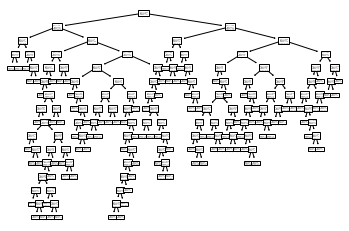

In [13]:
from sklearn import tree
tree.plot_tree(clf)


# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(70, 50))

# plot_tree(clf, filled=True)
# plt.title("Decision tree trained on all the iris features")
# plt.show()

## K-Nearest Neighbors Classification

KNN is one of the simplest and widely used classification algorithms in which a new data point is classified based on similarity in the specific group of neighboring data points. For a given data point in the set, the algorithms find the distances between this and all other K numbers of datapoint in the dataset close to the initial point and votes for that category that has the most frequency. Usually, Euclidean distance is taking as a measure of distance.

Step 1: Select the value of K neighbors(say k=5)

 

Step 2: Find the K (5) nearest data point for our new data point based on euclidean distance

 

Step 3: Among these K data points count the data points in each category

 

Step 4: Assign the new data point to the category that has the most neighbors of the new datapoint

![](images/8.jpg)


Choosing the optimal value for K is best done by first inspecting the data. In general, a large K value is more precise as it reduces the overall noise but there is no guarantee. Generally we can use the Square root of the number of samples in the dataset as value for K. Historically, the optimal K for most datasets has been between 3-10. That produces much better results than 1NN.

### Standardized Distance		
One major drawback in calculating distance measures directly from the training set is in the case where variables have different measurement scales or there is a mixture of numerical and categorical variables. For example, if one variable is based on annual income in dollars, and the other is based on age in years then income will have a much higher influence on the distance calculated. One solution is to standardize the training set using feature scaling.

In [10]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=3)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7532467532467533
Precision: 0.7058823529411765
Recall: 0.5647058823529412
F1-Score: 0.6274509803921569
